In [2]:
#Packages
!pip install keras
!pip install tensorflow
!pip install unidecode

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve,ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.decomposition import PCA
import os
import re
from scipy import spatial
from sklearn.manifold import TSNE
import math
from unidecode import unidecode

  Using cached tensorflow-2.16.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached grpcio-1.62.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflow-2.16.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached gast-0.5.4-py3-none-any.whl (19 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
Using cached grpcio-1.62.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.5 MB)
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)


# Importation et formatage des données #

In [3]:
#Importation de base 1
fichier = "data/firstname_with_sex.csv"
name_sex = pd.read_csv(fichier, sep=';')
name_sex

,firstname,male,female
0,marie,10145,2390322
1,jean,1869615,6476
2,pierre,1475841,5047
3,jeanne,1765,1097397
4,françois,1089009,5951
...,...,...,...
6941,winnocq,10,0
6942,xyste,9,1
6943,zara,0,10
6944,zéraphin,10,0


In [4]:
#Importation de base 2
fichier2 = "data/transcriptions_with_sex.csv"
transc = pd.read_csv(fichier2)
transc

,subject_line,groundtruth,prediction,sex
0,ebb26ada-044c-4c62-9dbc-a9c8d505d31c,surname: Chardon firstname: Marie occupation: ...,nom: Chardon prénom: Marie date_naissance: 30 ...,femme
1,338496f5-e4ca-43ac-aa5c-429cb3f6ac00,surname: Lhopital firstname: Louis-Jean occupa...,nom: Lhopital prénom: Louis Jean date_naissanc...,homme
2,e6a279da-9b6f-4f49-b498-64857bc50d1e,surname: Papin firstname: Marie occupation: id...,nom: Pyrin prénom: Marie date_naissance: 55 re...,femme
3,7534deca-39e8-4f00-be17-c12460015de1,surname: Lavocat firstname: Marie link: femme ...,nom: Lavocat prénom: Marie date_naissance: 187...,femme
4,ef334a66-a504-418a-9872-e7c9db923488,surname: Benne firstname: Marguerite age: 78,nom: Benne prénom: Marguerite date_naissance: ...,femme
...,...,...,...,...
236,1d92738a-cffe-4aee-ab10-db04c37f7405,surname: Burlurut firstname: Pétronille occupa...,nom: Burlurut prénom: Gihromille date_naissanc...,femme
237,09440055-7972-4135-a537-e6c5a1f2aeb2,surname: Combey firstname: Alexandre occupatio...,nom: Comberf prénom: Alexandre date_naissance:...,homme
238,4d387278-12c3-410c-bdf0-c5c603479764,surname: Collin firstname: Marguerite occupati...,nom: Collin prénom: Marguerite date_naissance:...,femme
239,623b95de-f87c-4844-a7f7-361088eed83a,surname: Dumont firstname: Etienne link: fils ...,nom: Dumont prénom: Etienne date_naissance: 19...,homme


In [5]:
transc['sex'].value_counts()

sex
homme     125
femme     107
ambigu      9
Name: count, dtype: int64

In [6]:
#Convert in character
transc['groundtruth'] = transc['groundtruth'].astype(str)

#We divide by ":"
split = transc['groundtruth'].str.split(":", expand=True)
split

,0,1,2,3,4,5,6,7
0,surname,Chardon firstname,Marie occupation,idem link,fille age,30,None,None
1,surname,Lhopital firstname,Louis-Jean occupation,sp link,chef age,67,None,None
2,surname,Papin firstname,Marie occupation,idem link,idem employer,idem age,15,None
3,surname,Lavocat firstname,Marie link,femme birth_date,1875 lob,Rigny,None,None
4,surname,Benne firstname,Marguerite age,78,None,None,None,None
...,...,...,...,...,...,...,...,...
236,surname,Burlurut firstname,Pétronille occupation,sans profession link,épouse age,61 ans,None,None
237,surname,Combey firstname,Alexandre occupation,idem link,son fils age,39,None,None
238,surname,Collin firstname,Marguerite occupation,idem link,épouse employer,idem age,38,None
239,surname,Dumont firstname,Etienne link,fils birth_date,1900 lob,idem,None,None


I extract column by taking the last words of the column above. I just don't take the last column because it's a value and not the name of a category. 

In [7]:
#List of columns
colonnes = ['surname', 'firstname', 'occupation', 'link', 'employer', 'birth_date', 'age', 'lob', 'civil_status', 'observation'] #I add observation because it was printed as error. 
donnees = {colonne: [] for colonne in colonnes}

#Fill the dictionnary with the elements
for row in transc['groundtruth']:
    #Empty temporary dict in initialisation 
    temp = {colonne: None for colonne in colonnes}
    #Use of ReGex 
    info = re.findall(r'(\w+): (\w+)', row)
    for colonne, valeur in info:
        # We add the corresponding value 
        temp[colonne] = valeur
    #Definitive dict
    for colonne in colonnes:
        donnees[colonne].append(temp[colonne])

# Créer un DataFrame à partir des données extraites
nouvelle_base_man = pd.DataFrame(donnees)
nouvelle_base_man 

#Add sex in the database 
df_def = pd.merge(nouvelle_base_man, transc, left_index=True, right_index=True, how='left')
df_def = df_def[['surname', 'firstname', 'occupation', 'link', 'employer', 'birth_date',
       'age', 'lob', 'civil_status', 'observation', 'sex']]#We drop useless columns
df_def

,surname,firstname,occupation,link,employer,birth_date,age,lob,civil_status,observation,sex
0,Chardon,Marie,idem,fille,None,None,30,None,None,None,femme
1,Lhopital,Louis,sp,chef,None,None,67,None,None,None,homme
2,Papin,Marie,idem,idem,idem,None,15,None,None,None,femme
3,Lavocat,Marie,None,femme,None,1875,None,Rigny,None,None,femme
4,Benne,Marguerite,None,None,None,None,78,None,None,None,femme
...,...,...,...,...,...,...,...,...,...,...,...
236,Burlurut,Pétronille,sans,épouse,None,None,61,None,None,None,femme
237,Combey,Alexandre,idem,son,None,None,39,None,None,None,homme
238,Collin,Marguerite,idem,épouse,idem,None,38,None,None,None,femme
239,Dumont,Etienne,None,fils,None,1900,None,idem,None,None,homme


Now, using the database about the name and the number of times they were gave to each sex, we will calculus a man proportion and a woman proportion for each name and add it to our current database. 

In [8]:
#Calculus of probabilities 
name_sex['prob_masc'] = name_sex['male'] / (name_sex['male'] + name_sex['female'])
name_sex['prob_fem'] = name_sex['female'] / (name_sex['male'] + name_sex['female'])
name_sex.head(50)

,firstname,male,female,prob_masc,prob_fem
0,marie,10145,2390322,0.004226,0.995774
1,jean,1869615,6476,0.996548,0.003452
2,pierre,1475841,5047,0.996592,0.003408
3,jeanne,1765,1097397,0.001606,0.998394
4,françois,1089009,5951,0.994565,0.005435
5,joseph,897742,4246,0.995293,0.004707
6,anne,1479,816241,0.001809,0.998191
7,marguerite,1441,813859,0.001767,0.998233
8,catherine,1223,792448,0.001541,0.998459
9,louis,750498,2720,0.996389,0.003611


In [9]:
#Labelisation pour le modèle 95%

def label_sex(prob_m, prob_f):
    if prob_m>=0.95:
        return 'homme'
    if prob_f>=0.95:
        return 'femme'
    else:
        return 'ambigu'

name_sex['sex'] = name_sex.apply(lambda row: label_sex(row['prob_masc'], row['prob_fem']), axis=1)
name_sex

,firstname,male,female,prob_masc,prob_fem,sex
0,marie,10145,2390322,0.004226,0.995774,femme
1,jean,1869615,6476,0.996548,0.003452,homme
2,pierre,1475841,5047,0.996592,0.003408,homme
3,jeanne,1765,1097397,0.001606,0.998394,femme
4,françois,1089009,5951,0.994565,0.005435,homme
...,...,...,...,...,...,...
6941,winnocq,10,0,1.000000,0.000000,homme
6942,xyste,9,1,0.900000,0.100000,ambigu
6943,zara,0,10,0.000000,1.000000,femme
6944,zéraphin,10,0,1.000000,0.000000,homme


In [10]:
#Labelisation pour modèle majoritaire
def majo(prob_m, prob_f):
        if prob_m>= prob_f: 
            return'homme'
        else:
            return 'femme'
name_sex['majo'] = name_sex.apply(lambda row: majo(row['prob_masc'], row['prob_fem']), axis=1)
name_sex

,firstname,male,female,prob_masc,prob_fem,sex,majo
0,marie,10145,2390322,0.004226,0.995774,femme,femme
1,jean,1869615,6476,0.996548,0.003452,homme,homme
2,pierre,1475841,5047,0.996592,0.003408,homme,homme
3,jeanne,1765,1097397,0.001606,0.998394,femme,femme
4,françois,1089009,5951,0.994565,0.005435,homme,homme
...,...,...,...,...,...,...,...
6941,winnocq,10,0,1.000000,0.000000,homme,homme
6942,xyste,9,1,0.900000,0.100000,ambigu,homme
6943,zara,0,10,0.000000,1.000000,femme,femme
6944,zéraphin,10,0,1.000000,0.000000,homme,homme


In [11]:
#We convert firstname in both column without accent and capital letters (We choose first name because we trust more manual recolt) 
name_sex['firstname'] = name_sex['firstname'].astype(str)
name_sex['firstname'] = name_sex['firstname'].apply(lambda x: unidecode(x).lower()) 
df_def['firstname'] = df_def['firstname'].apply(lambda x: unidecode(x).lower() if pd.notna(x) else x)
df_def = df_def[df_def['sex'] != 'ambigu']
df_def

,surname,firstname,occupation,link,employer,birth_date,age,lob,civil_status,observation,sex
0,Chardon,marie,idem,fille,None,None,30,None,None,None,femme
1,Lhopital,louis,sp,chef,None,None,67,None,None,None,homme
2,Papin,marie,idem,idem,idem,None,15,None,None,None,femme
3,Lavocat,marie,None,femme,None,1875,None,Rigny,None,None,femme
4,Benne,marguerite,None,None,None,None,78,None,None,None,femme
...,...,...,...,...,...,...,...,...,...,...,...
236,Burlurut,petronille,sans,épouse,None,None,61,None,None,None,femme
237,Combey,alexandre,idem,son,None,None,39,None,None,None,homme
238,Collin,marguerite,idem,épouse,idem,None,38,None,None,None,femme
239,Dumont,etienne,None,fils,None,1900,None,idem,None,None,homme


In [12]:
df_def.info() #Analyse des valeurs manquantes par catégories 

<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, 0 to 240
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   surname       231 non-null    object
 1   firstname     231 non-null    object
 2   occupation    190 non-null    object
 3   link          221 non-null    object
 4   employer      46 non-null     object
 5   birth_date    47 non-null     object
 6   age           189 non-null    object
 7   lob           35 non-null     object
 8   civil_status  3 non-null      object
 9   observation   1 non-null      object
 10  sex           232 non-null    object
dtypes: object(11)
memory usage: 21.8+ KB


In [13]:
name_sex_unique = name_sex.drop_duplicates(subset=['firstname'])
probabilities = name_sex_unique.set_index('firstname').to_dict(orient='index')

# We link each probability with map
df_def['prob_masc'] = df_def['firstname'].map(lambda x: probabilities[x]['prob_masc'] if x in probabilities else None)
df_def['prob_fem'] = df_def['firstname'].map(lambda x: probabilities[x]['prob_fem'] if x in probabilities else None)
df_def['majo'] = df_def['sex']

/tmp/ipykernel_254/3103872558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def['prob_masc'] = df_def['firstname'].map(lambda x: probabilities[x]['prob_masc'] if x in probabilities else None)
/tmp/ipykernel_254/3103872558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def['prob_fem'] = df_def['firstname'].map(lambda x: probabilities[x]['prob_fem'] if x in probabilities else None)
/tmp/ipykernel_254/3103872558.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [14]:
df = df_def.drop(['surname', 'birth_date', 'age', 'lob'], axis=1) #On enlève les colonnes inutiles

In [15]:
#We add the value of names that are not in firstname 
name_sex_joint = name_sex.drop(['male', 'female'], axis=1)

common_cols = df.columns.intersection(name_sex_joint.columns)
extra_cols = name_sex_joint.columns.difference(df.columns)
extra_df = pd.DataFrame(None, index=name_sex_joint.index, columns=extra_cols)

# Filtrer les lignes de name_sex où 'firstname' n'existe pas déjà dans df
filtered_name_sex = name_sex_joint[~name_sex_joint['firstname'].isin(df['firstname'])]

# Concaténer les DataFrames filtered_name_sex et merged_df
final_df = pd.concat([filtered_name_sex, df])

# Réinitialiser les index
final_df.reset_index(drop=True, inplace=True)

final_df

,firstname,prob_masc,prob_fem,sex,majo,occupation,link,employer,civil_status,observation
0,michel,0.996127,0.003873,homme,homme,NaN,NaN,NaN,NaN,NaN
1,guillaume,0.996009,0.003991,homme,homme,NaN,NaN,NaN,NaN,NaN
2,yves,0.996545,0.003455,homme,homme,NaN,NaN,NaN,NaN,NaN
3,julien,0.995715,0.004285,homme,homme,NaN,NaN,NaN,NaN,NaN
4,marianne,0.002083,0.997917,femme,femme,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7028,petronille,0.002291,0.997709,femme,femme,sans,épouse,None,None,None
7029,alexandre,0.995444,0.004556,homme,homme,idem,son,None,None,None
7030,marguerite,0.001767,0.998233,femme,femme,idem,épouse,idem,None,None
7031,etienne,0.995768,0.004232,homme,homme,None,fils,None,None,None


In [16]:
df2 = final_df.copy()

In [17]:
for colonne in df2.columns:
     df2[colonne] = df2[colonne].apply(lambda x: unidecode(x).lower() if isinstance(x, str) else x) #convert all in lower character to avoid differences by letter case
df2

,firstname,prob_masc,prob_fem,sex,majo,occupation,link,employer,civil_status,observation
0,michel,0.996127,0.003873,homme,homme,NaN,NaN,NaN,NaN,NaN
1,guillaume,0.996009,0.003991,homme,homme,NaN,NaN,NaN,NaN,NaN
2,yves,0.996545,0.003455,homme,homme,NaN,NaN,NaN,NaN,NaN
3,julien,0.995715,0.004285,homme,homme,NaN,NaN,NaN,NaN,NaN
4,marianne,0.002083,0.997917,femme,femme,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7028,petronille,0.002291,0.997709,femme,femme,sans,epouse,None,None,None
7029,alexandre,0.995444,0.004556,homme,homme,idem,son,None,None,None
7030,marguerite,0.001767,0.998233,femme,femme,idem,epouse,idem,None,None
7031,etienne,0.995768,0.004232,homme,homme,None,fils,None,None,None


In [18]:
df2.to_csv('data/base.csv', index=False) #We save to avoid all the steps before when we want to work 

# Statistiques Descriptives #

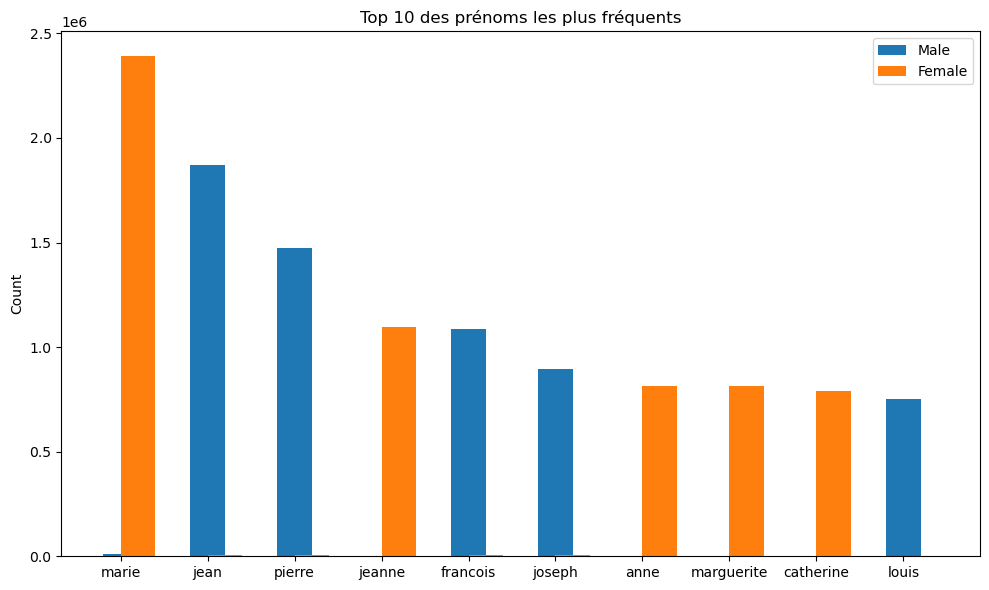

In [19]:
#Most frequent names
top_10 = name_sex.head(10) #Les données sont déjà dans l'ordre
fig, axes = plt.subplots(figsize=(10, 6)) 
axes.bar(top_10['firstname'], top_10['male'], width=0.4, align='center', label='Male')
axes.bar(top_10['firstname'], top_10['female'], width=0.4, align='edge', label='Female')
axes.set_title('Top 10 des prénoms les plus fréquents')
axes.set_ylabel('Count')
axes.legend()
plt.tight_layout() 
plt.savefig('Graphs/top10.jpg')
plt.show()

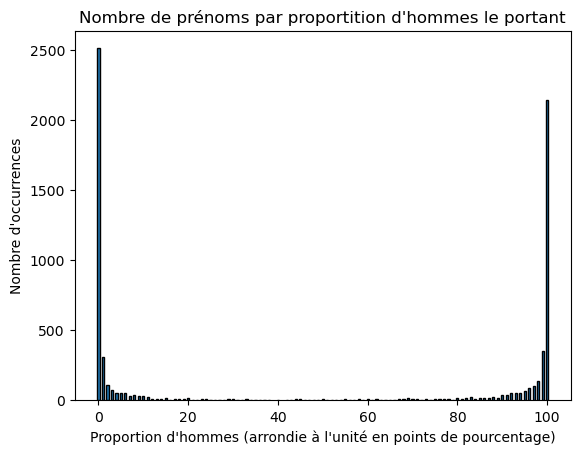

In [20]:
# Récupérer les valeurs de proportion_homme
proportion_homme_values = name_sex['prob_masc']*100
occurrences = proportion_homme_values.round().value_counts().sort_index() #Occurences

# Créer un histogramme
plt.bar(occurrences.index, occurrences.values, width=0.5, edgecolor='black')
plt.xlabel("Proportion d'hommes (arrondie à l'unité en points de pourcentage)")
plt.ylabel("Nombre d\'occurrences")
plt.title("Nombre de prénoms par proportition d'hommes le portant")
plt.savefig("Graphs/Nombre_hommes.jpg")
plt.show()

In [21]:
name_sorted = name_sex.sort_values(by='female', ascending=False) #Structure on feminine names
name_sorted.head(50)

,firstname,male,female,prob_masc,prob_fem,sex,majo
0,marie,10145,2390322,0.004226,0.995774,femme,femme
3,jeanne,1765,1097397,0.001606,0.998394,femme,femme
6,anne,1479,816241,0.001809,0.998191,femme,femme
7,marguerite,1441,813859,0.001767,0.998233,femme,femme
8,catherine,1223,792448,0.001541,0.998459,femme,femme
10,francoise,1153,600167,0.001917,0.998083,femme,femme
14,louise,681,360914,0.001883,0.998117,femme,femme
17,elisabeth,353,224969,0.001567,0.998433,femme,femme
18,madeleine,424,217939,0.001942,0.998058,femme,femme
22,claudine,280,163711,0.001707,0.998293,femme,femme


In [22]:
df = pd.read_csv('data/base.csv') #Importation
df

,firstname,prob_masc,prob_fem,sex,majo,occupation,link,employer,civil_status,observation
0,michel,0.996127,0.003873,homme,homme,NaN,NaN,NaN,NaN,NaN
1,guillaume,0.996009,0.003991,homme,homme,NaN,NaN,NaN,NaN,NaN
2,yves,0.996545,0.003455,homme,homme,NaN,NaN,NaN,NaN,NaN
3,julien,0.995715,0.004285,homme,homme,NaN,NaN,NaN,NaN,NaN
4,marianne,0.002083,0.997917,femme,femme,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7028,petronille,0.002291,0.997709,femme,femme,sans,epouse,NaN,NaN,NaN
7029,alexandre,0.995444,0.004556,homme,homme,idem,son,NaN,NaN,NaN
7030,marguerite,0.001767,0.998233,femme,femme,idem,epouse,idem,NaN,NaN
7031,etienne,0.995768,0.004232,homme,homme,NaN,fils,NaN,NaN,NaN


In [23]:
df['prof_hf'] = df['prob_masc'] - df['prob_fem']
df
#The idea is that: if the value is near 1, it's masculine. If it's near -1, it's feminine. Near 0, it's ambiguous. 

,firstname,prob_masc,prob_fem,sex,majo,occupation,link,employer,civil_status,observation,prof_hf
0,michel,0.996127,0.003873,homme,homme,NaN,NaN,NaN,NaN,NaN,0.992253
1,guillaume,0.996009,0.003991,homme,homme,NaN,NaN,NaN,NaN,NaN,0.992017
2,yves,0.996545,0.003455,homme,homme,NaN,NaN,NaN,NaN,NaN,0.993090
3,julien,0.995715,0.004285,homme,homme,NaN,NaN,NaN,NaN,NaN,0.991429
4,marianne,0.002083,0.997917,femme,femme,NaN,NaN,NaN,NaN,NaN,-0.995833
...,...,...,...,...,...,...,...,...,...,...,...
7028,petronille,0.002291,0.997709,femme,femme,sans,epouse,NaN,NaN,NaN,-0.995419
7029,alexandre,0.995444,0.004556,homme,homme,idem,son,NaN,NaN,NaN,0.990888
7030,marguerite,0.001767,0.998233,femme,femme,idem,epouse,idem,NaN,NaN,-0.996465
7031,etienne,0.995768,0.004232,homme,homme,NaN,fils,NaN,NaN,NaN,0.991536


In [24]:
#We will create a database with some characteristics about names. 
# Nombre de lettres
df['firstname'] = df['firstname'].astype(str)

df['nb_lt'] = df['firstname'].apply(lambda x: len(x))
df['last_lt'] = df['firstname'].str[-1]
df['2last_lt'] = df['firstname'].str[-2:]
df['3last_lt'] = df['firstname'].str[-3:]

df

,firstname,prob_masc,prob_fem,sex,majo,occupation,link,employer,civil_status,observation,prof_hf,nb_lt,last_lt,2last_lt,3last_lt
0,michel,0.996127,0.003873,homme,homme,NaN,NaN,NaN,NaN,NaN,0.992253,6,l,el,hel
1,guillaume,0.996009,0.003991,homme,homme,NaN,NaN,NaN,NaN,NaN,0.992017,9,e,me,ume
2,yves,0.996545,0.003455,homme,homme,NaN,NaN,NaN,NaN,NaN,0.993090,4,s,es,ves
3,julien,0.995715,0.004285,homme,homme,NaN,NaN,NaN,NaN,NaN,0.991429,6,n,en,ien
4,marianne,0.002083,0.997917,femme,femme,NaN,NaN,NaN,NaN,NaN,-0.995833,8,e,ne,nne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,petronille,0.002291,0.997709,femme,femme,sans,epouse,NaN,NaN,NaN,-0.995419,10,e,le,lle
7029,alexandre,0.995444,0.004556,homme,homme,idem,son,NaN,NaN,NaN,0.990888,9,e,re,dre
7030,marguerite,0.001767,0.998233,femme,femme,idem,epouse,idem,NaN,NaN,-0.996465,10,e,te,ite
7031,etienne,0.995768,0.004232,homme,homme,NaN,fils,NaN,NaN,NaN,0.991536,7,e,ne,nne


/tmp/ipykernel_254/2346930193.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model['majo'] = df_model['majo'].replace({'homme': 1, 'femme': -1})
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.86



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


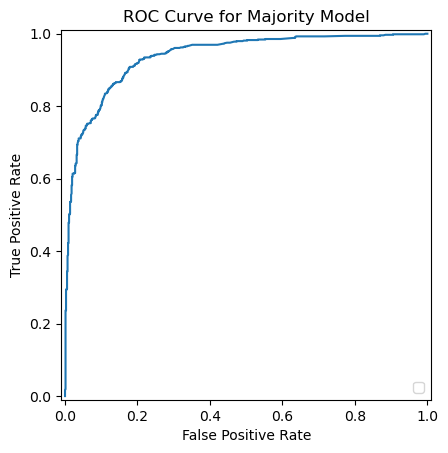

In [25]:
df_model = df.drop(['firstname', 'sex', 'prof_hf', 'occupation', 'link', 'employer', 'civil_status', 'observation', 'prob_masc', 'prob_fem'], axis =1)
df_model['majo'] = df_model['majo'].replace({'homme': 1, 'femme': -1})
df_model = pd.get_dummies(df_model, columns=['last_lt', '2last_lt', '3last_lt'])
df_model = df_model.dropna()
X = df_model.drop(columns=['majo'])
y = df_model['majo']

#Split the data into a train set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Create a Logistic Regression

model = LogisticRegression(penalty='l2', C=1, solver='saga')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')

# Make predictions on the test set
y_pred = model.predict(X_test)

y_score = model.decision_function(X_test)
# Calculate the true positive rate and false positive rate for a range of thresholds
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])

# Plot the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC Curve for Majority Model')
plt.savefig('Graphs/ROC_majo.png')

/tmp/ipykernel_254/1305933185.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model['sex'] = df_model['sex'].replace({'homme': 1, 'femme': -1})
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.91



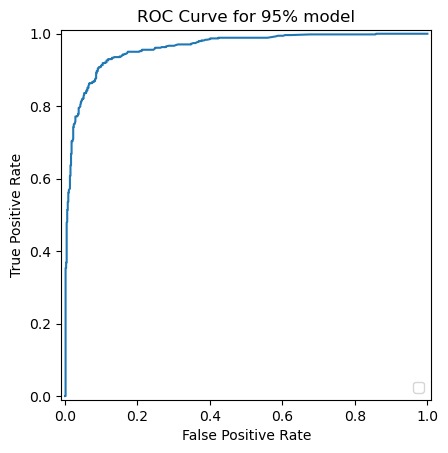

In [26]:
df_model = df.drop(['firstname', 'majo', 'prof_hf', 'occupation', 'link', 'employer', 'civil_status', 'observation', 'prob_masc', 'prob_fem'], axis =1)
df_model = df_model[df_model['sex'] != 'ambigu']
df_model['sex'] = df_model['sex'].replace({'homme': 1, 'femme': -1})
df_model = pd.get_dummies(df_model, columns=['last_lt', '2last_lt', '3last_lt'])
df_model = df_model.dropna()
X = df_model.drop(columns=['sex'])
y = df_model['sex']

#Split the data into a train set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Create a Logistic Regression

model = LogisticRegression(penalty='l2', C=1, solver='saga')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')

# Make predictions on the test set
y_pred = model.predict(X_test)

y_score = model.decision_function(X_test)

# Calculate the true positive rate and false positive rate for a range of thresholds
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])

# Plot the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC Curve for 95% model')
plt.savefig('Graphs/ROC_sex.png')

In [29]:
#test de plusieurs partitions de validation croisée

from sklearn.model_selection import cross_val_score

for split in  [[0.1, 10], [0.2, 5] , [0.25, 4], [0.33, 3], [0.5,2]]: 
    #Split the data into a train set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split[0], random_state=1)

    model = LogisticRegression(penalty='l2', C=1, solver='saga')

    model.fit(X_train, y_train)

    scores = cross_val_score(model, X, y, cv=split[1])  

    print("Cross-Validation Scores:" + str(split), scores)


/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Cross-Validation Scores:[0.1, 10] [0.88741722 0.9205298  0.92218543 0.89569536 0.90728477 0.90547264
 0.90215589 0.89883914 0.90713101 0.90215589]


/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Cross-Validation Scores:[0.2, 5] [0.90720795 0.91052196 0.90472245 0.90306545 0.90555095]


/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Cross-Validation Scores:[0.25, 4] [0.91252485 0.90523526 0.90390987 0.89854111]


/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Cross-Validation Scores:[0.33, 3] [0.91252485 0.90258449 0.89855793]


/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Cross-Validation Scores:[0.5, 2] [0.90722333 0.90222075]


/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [30]:
df_part = df.drop(['firstname', 'prof_hf', 'occupation', 'link', 'employer', 'civil_status', 'observation', 'prob_masc', 'prob_fem'], axis =1)
df_sex = df_part[df_part['sex'] != 'ambigu']
df_part.dropna()
df_sex.dropna() 
[df_part.shape[0], df_sex.shape[0]] #On compare le nombre d'observations dans chaque modèle

[7033, 6035]

## ANNEXE : Principal Component Analysis avec les variables explicatives ##

In [31]:
df_model = df.drop(['firstname', 'majo', 'prof_hf', 'occupation', 'link', 'employer', 'civil_status', 'observation', 'prob_masc', 'prob_fem'], axis =1)
df_model = df_model[df_model['sex'] != 'ambigu']
X = pd.get_dummies(df_model, columns=['last_lt', '2last_lt', '3last_lt'])
X.shape #On veut connaître les dimensions

(6035, 1174)

In [32]:
#PCA 
var= 0.95 #On veut que la réduction résume 95% de la variance des données. 
#Nous n'avons pas normalisé les données car étant binaires, j'estimais qu'elles l'étaient déjà. 
pca_breast = PCA(n_components=var)
fit_pca = pca_breast.fit_transform(X.drop('sex', axis =1))
fit_pca.shape

(6035, 239)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.90



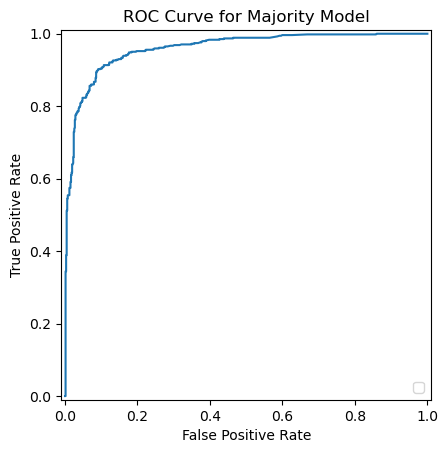

In [33]:
X = pd.DataFrame(fit_pca)

X = X.dropna()
y = df_model['sex'].dropna()

#Split the data into a train set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Create a Logistic Regression

model = LogisticRegression(penalty='l2', C=1, solver='saga')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')

# Make predictions on the test set
y_pred = model.predict(X_test)

y_score = model.decision_function(X_test)
# Calculate the true positive rate and false positive rate for a range of thresholds
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])

# Plot the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC Curve for Majority Model')
plt.savefig('Graphs/ROC_sex_PCA.png')